In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#self-defined file
import defs

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import jieba.posseg as pseg
import os
import keras
from sklearn.tree import tree
import random
from fuzzywuzzy import fuzz

TRAIN_CSV_PATH = './train.csv'
TEST_CSV_PATH = './test.csv'
TOKENIZED_TRAIN_CSV_PATH = None

train = pd.read_csv(TRAIN_CSV_PATH, index_col='id')
train.head(100)

Using TensorFlow backend.
c:\users\a09182734\appdata\local\programs\python\python36\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
id,,,,,,,
0,0,1,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
3,2,3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
1,2,4,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
2,2,5,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP topped Hong Kong last year? She...,unrelated
9,6,7,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,"""How to discriminate oil from gutter oil by me...",It took 30 years of cooking oil to know that o...,agreed
4,2,8,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？统计局辟谣：未超但差距再度缩小,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
6,9,10,"""吃榴莲的禁忌,吃错会致命!","榴莲不能和什么一起吃 与咖啡同吃诱发心脏病""""","""if you eat durian, you will kill yourself if ...","Durian can't eat with anything, it's the same ...",unrelated
5,2,11,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？辟谣：未超但差距再度缩小,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated
7,12,13,"""旅行青蛙？居然是一款""""生育意愿测试器”！大家还是玩""""珠宝V课""""吧""",咸宁一家店的蛋糕含有“棉花”？崇阳多部门联合辟谣,"""Frog frog? It's a fertility test! Let's play""...","A store in xianning contains ""cotton""? A multi...",unrelated


In [6]:
#把空值填上
train.title2_zh.fillna('UNKNOWN', inplace=True)
train.isna().any()

tid1                False
tid2                False
title1_zh           False
title2_zh           False
title1_en           False
title2_en           False
label               False
title1_tokenized    False
title2_tokenized     True
dtype: bool

In [48]:
#生成4個feature
#overlap_ratio = overlap ratio of string matching 
#partial_ratio = partial overlap ratio of string matching
#tokenset_ratio = token set ratio matching
#rumor = word Rumours
FEATURE_NAMES = ['overlap_ratio','partial_ratio','tokenset_ratio','rumor']

if os.path.exists("./feature_train.csv"):
    feature = pd.read_csv("./feature_train.csv", index_col=1)
else:
    feature = pd.DataFrame(columns=FEATURE_NAMES)
    for x1,x2 in zip(train['title1_zh'],train['title2_zh']):
        overlap_ratio = fuzz.ratio(x1,x2)/100
        partial_ratio = fuzz.partial_ratio(x1, x2)/100
        tokenset_ratio = fuzz.token_set_ratio(x1,x2)/100
        if '谣' in x1+x2:
            rumor = int(1)
        else:
            rumor = int(0)
        df = pd.DataFrame([[overlap_ratio,partial_ratio,tokenset_ratio,rumor]],columns=FEATURE_NAMES)
        feature = feature.append(df,ignore_index=True)
    feature.to_csv('feature_train.csv',index=True)

    
 

In [60]:
#生成decision tree
TREE_NUM = 9
from sklearn.tree import tree
import random
treeY = pd.DataFrame(columns=['label'])

tree_model = []
clf = tree.DecisionTreeClassifier()
for i in range(TREE_NUM):
    sample = feature.sample(n=len(train['title1_zh']), replace=True)
    tree_model.append(clf.fit(sample, train['label']))
    

In [62]:
#生成測試資料的feature
import pandas as pd
test = pd.read_csv(TEST_CSV_PATH, index_col='id')
#把空值填上
test.title2_zh.fillna('UNKNOWN', inplace=True)
#生成feature
if os.path.exists("./feature_test.csv"):
    test_feature = pd.read_csv("./feature_test.csv", index_col=1)
else:
    test_feature = pd.DataFrame(columns=FEATURE_NAMES)
    for x1,x2 in zip(test['title1_zh'],test['title2_zh']):
        overlap_ratio = fuzz.ratio(x1,x2)/100
        partial_ratio = fuzz.partial_ratio(x1, x2)/100
        tokenset_ratio = fuzz.token_set_ratio(x1,x2)/100
        if '谣' in x1+x2:
            rumor = int(1)
        else:
            rumor = int(0)
        df = pd.DataFrame([[overlap_ratio,partial_ratio,tokenset_ratio,rumor]],columns=FEATURE_NAMES)
        test_feature = test_feature.append(df,ignore_index=True)
    test_feature.to_csv('feature_test.csv',index=True) 

# 利用已訓練的模型做預測
submission = pd.DataFrame(columns=['Id','Category'])
for i in range(len(test['title1_zh'])):
    label = [0,0,0]
    label_catagory = ['unrelated','agreed','disagreed']
    for j in range(TREE_NUM):
        prediction = tree_model[j].predict([test_feature.iloc[i]])[0]
        if prediction == 'unrelated':
            label[0] = label[0]+1
        elif prediction == 'agreed':
            label[1] = label[1]+1
        else:
            label[2] = label[2]+1
    sub_catagory = label_catagory[label.index(max(label))]
    df = pd.DataFrame([[test.index[i],sub_catagory]],columns=['Id','Category'])
    submission = submission.append(df,ignore_index=True)

submission.to_csv('submission.csv', index=False)
submission.head()

,Id,Category
0,321187,agreed
1,321190,agreed
2,321189,agreed
3,321193,agreed
4,321191,agreed


In [65]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],'num_wings': [2, 0, 0, 0],'num_specimen_seen': [10, 2, 1, 8]},index=['falcon', 'dog', 'spider', 'fish'])

(array([  44.,  871., 2231., 1841., 1329.,  790.,  423.,  211.,  124.,
         402.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

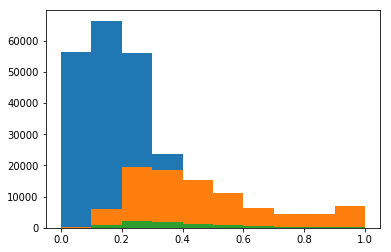

In [81]:
import matplotlib.pyplot as plt

un = []
ag = []
dis = []
for i,j in zip(train['label'],feature['tokenset_ratio']):
    if i == 'unrelated':
        un.append(j)
    elif i == 'agreed':
        ag.append(j)
    else:
        dis.append(j)
        
plt.hist(un)
plt.hist(ag)
plt.hist(dis)